# Homework 4: AM205, Ana Vitoria Rodrigues Lima


Collaborated with Adriana, Emma and went to Yue, Jovana and Chris OH.

## Problem 1

For the solutions of problem 1a and 1b please refer to the solutions in the Latex write up for problem 1a and 1b - the rest of the solutions are here.

## Problem 2

### 2a

Got the coding algorithm intuition from Yue OH and checked my answers with Marcel.

In [1]:
# Problem 2
import numpy as np
import matplotlib.pyplot as plt

pierce = np.loadtxt('am205_hw4_files/pierce.txt')

# from S
def p1(p0, t, w):
    return p0 * np.sin(w*t) #only where the speaker is

#this is the today matrix, the first time
def create_p1(p0, t, w): #this is pn with dimensions[j][k]  where n =1, because this is the "first today"
    p_curr = np.zeros((100,200)) # initialising to all zeros
    for j in range(0,100): # rows
        for k in range(0,200): # columns
            if (j >= 57) and (j <=60) and (k >= 15) and (k <=18): #where S is, where the loud speaker is
                p_curr[j][k] = p1(p0, t, w)
    return p_curr #today, which will change every day
    


def pierce_discrete(t, track_locations = False):

    ts = []
    person1 = []
    person2 = []
    person3 = []

    h = 36.6 # cm 
    c = 3.43 * 10**4 #cm s-1 centimeters/second
    w = 100 * np.pi # s-1 centimenters/second
    p0 = 10 # Pa = 1 N/m^2
    delta_t = h/(2*c) # timestep

    #Initialize p_old and p_curr for n = 1
    p_old = np.zeros((100,200))
    p_curr = create_p1(p0, t, w)
    p_next = np.zeros((100,200)) 
    
    N = t/delta_t
    count = 0
    t = 0
    for n in range(1, int(N)+1):
        # Need to do a step function for p_curr
        const = (c**2*delta_t**2)/h**2
        count = count +1

        # creating our initial matrix
        for j in range(0,99): # rows
        
            for k in range(0,199): # columns
            
                # if I am in the zone of the speaker:
                if (j >= 57) and (j <=60) and (k >= 15) and (k <=18):
                    p_next[j][k] = p1(p0, delta_t*count, w)
                    
                # else, around the house
                else:
                    # original discretization
                    p_next[j][k] = 2*p_curr[j][k] - p_old[j][k] + (const)*(p_curr[j+1][k] \
                    + p_curr[j][k+1]-4*p_curr[j][k]+p_curr[j-1][k] + p_curr[j][k-1]) # general case

                    if pierce[j][k] == 1: # hits a wall immediately
                        p_next[j][k] = 0 

                    if pierce[j][k] == 0: # need to update p_next & check all of 5 stencils
                    # we are doing if everywhere instead of elif because
                    # we want to check all of the cases regardless of whether the previous one was the case 
                    # conditions from YUE 
                        if pierce[j-1][k] == 1: #2.1
                            p_next[j][k] -= const*(p_curr[j-1][k] - p_curr[j][k])
                        
                        if pierce[j+1][k] == 1: #2.2
                            p_next[j][k] -= const*(p_curr[j+1][k] - p_curr[j][k])
                        
                        if pierce[j][k+1] == 1: #2.3
                            p_next[j][k] -= const*(p_curr[j][k+1] - p_curr[j][k])
                        
                        if pierce[j][k-1] == 1: #2.4
                            p_next[j][k] -= const*(p_curr[j][k-1] - p_curr[j][k])

        # need to update matrices for next n
        p_old = p_curr.copy()
        p_curr = p_next.copy()
        t += delta_t

        if track_locations == True:
            person1.append(p_curr[35][73])
            person2.append(p_curr[61][109])
            person3.append(p_curr[91][188])
            ts.append(t)

    if track_locations == False:
        return p_next

    elif track_locations == True:
        return p_next, person1, person2, person3, ts

### 2b

In [2]:
h = 36.6 # cm 
c = 3.43 * 10**4 #cm s-1 centimeters/second
w = 100 * np.pi # s-1 centimenters/second
p0 = 10 # Pa = 1 N/m^2
delta_t = h/(2*c) # timestep
w_ = pierce_discrete(0.015)

import numpy as np
import custom_plot as cplt
from math import sin

# Load in the wall matrix
q_ = np.loadtxt("pierce.txt",dtype=np.int8)

# Call the first custom plotting routine
cplt.plot1("015_1.png",w_, q_,-1.1,1.1,3)

# Call the second custom plotting routine
cplt.plot2("015_2.png",w_, q_,-1.1,1.1,3)


### Plot 1: at t = 0.015 seconds. 

![alt text](015_1.png "Image of the building after 0.015 seconds")
![alt text](015_2.png "Image of the building after 0.015 seconds")




In [3]:
w_ = pierce_discrete(0.105)

# Load in the wall matrix
q_ = np.loadtxt("pierce.txt",dtype=np.int8)

# Call the first custom plotting routine
cplt.plot1("105_1.png",w_, q_,-1.1,1.1,3)

# Call the second custom plotting routine
cplt.plot2("105_2.png",w_, q_,-1.1,1.1,3)

### Plot 2: at t = 0.105 seconds. 



![alt text](105_1.png "Image of the building after 0.015 seconds")
![alt text](105_2.png "Image of the building after 0.015 seconds")





In [4]:
w_ = pierce_discrete(0.505)

# Load in the wall matrix
q_ = np.loadtxt("pierce.txt",dtype=np.int8)

# Call the first custom plotting routine
cplt.plot1("505_1.png",w_, q_,-1.1,1.1,3)

# Call the second custom plotting routine
cplt.plot2("505_2.png",w_, q_,-1.1,1.1,3)

### Plot 3: at t = 0.505 seconds. 



![alt text](505_1.png "Image of the building after 0.015 seconds")
![alt text](505_2.png "Image of the building after 0.015 seconds")





In [5]:
w_ = pierce_discrete(1.005)

# Load in the wall matrix
q_ = np.loadtxt("pierce.txt",dtype=np.int8)

# Call the first custom plotting routine
cplt.plot1("1_005_1.png",w_, q_,-1.1,1.1,3)

# Call the second custom plotting routine
cplt.plot2("1_005_2.png",w_, q_,-1.1,1.1,3)

### Plot 4: at t = 1.005 seconds. 



![alt text](1_005_1.png "Image of the building after 0.015 seconds")
![alt text](1_005_2.png "Image of the building after 0.015 seconds")





### 2c

In [6]:
# Want to know when |p(t)| at locations (35, 73), (61, 109) and (91, 188) exceeds 10−3 Pa. 
w, person1, person2, person3, ts = pierce_discrete(1, track_locations = True)

In [7]:
#len(person1)
#len(person2)
#len(person3)

In [8]:
person1_ind = None
person2_ind = None
person3_ind = None

for i in range(len(np.linspace(0.001, 1, 1000))):
    
    if (abs(person1[i]) > 10**(-3)) and (person1_ind == None):
        person1_ind = i

    if abs(person2[i]) > 10**(-3) and (person2_ind == None):
        person2_ind = i

    if abs(person3[i]) > 10**(-3) and (person3_ind == None):
        person3_ind = i

In [9]:
h = 36.6 # cm 
c = 3.43 * 10**4 #cm s-1 centimeters/second
delta_t = h/(2*c) # timestep
#delta_t

In [10]:
h = 36.6 # cm 
c = 3.43 * 10**4 #cm s-1 centimeters/second
delta_t = h/(2*c) # timestep

print("The person C at location (35, 73) is first hearing the sound at second t = ", ts[person1_ind])
print("The person G at location (61, 109) is first hearing the sound at second t =", ts[person2_ind])
print("The person M at location (91, 188) is first hearing the sound at second t =", ts[person3_ind])

The person C at location (35, 73) is first hearing the sound at second t =  0.07362682215743453
The person G at location (61, 109) is first hearing the sound at second t = 0.1088396501457728
The person M at location (91, 188) is first hearing the sound at second t = 0.231017492711368


**Discuss whether your results are reasonable, given the locations of the people in relation to the loudspeaker.**

Yes these results seem reasonable. Meaning, the farther away from the speaker, the longer the time it will take for those people to hear the sound at first.

### 2d

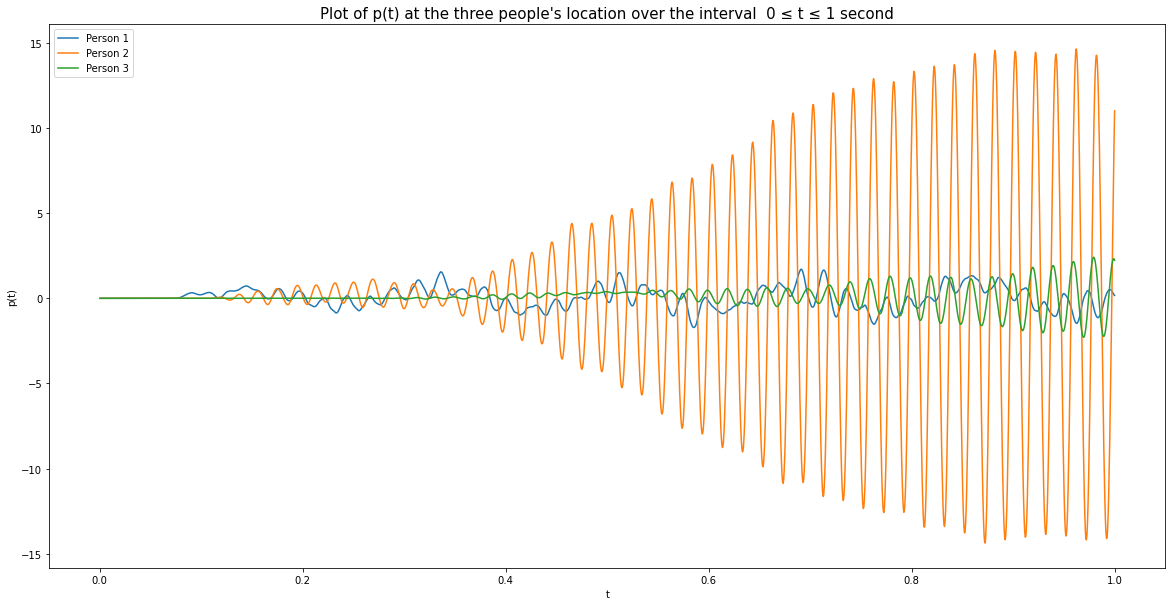

In [16]:
# plot p(t) at the three people’s locations over the interval 0 ≤ t ≤ 1 s

plt.figure(figsize=(20,10))
plt.plot(ts, person1,label = 'Person 1')
plt.plot(ts, person2, label = 'Person 2')
plt.plot(ts, person3, label = 'Person 3')
plt.title("Plot of p(t) at the three people's location over the interval  0 ≤ t ≤ 1 second", size = 15)
plt.legend()

plt.xlabel('t')
plt.ylabel('p(t)')
plt.show()

**Which person is most likely to be disturbed by the loudspeaker?**

The person that is most likely to be disturbed by the loudspeaker is person G at location (61, 109) because at location of the person G the sound has the largest magnitude - see the orange curve above. 

## Problem 3

As per exercise's prompt, in this exercise we are trying to solve the nonlinear ordinary differential equation BVP

$$u'' (x) = e^{u(x)}, x \in (-1,1)$$

Additionally, we know that the boundary consitions are $u(-1) = u(1) = 0$. 

In this exercise I will use the Newton's method to solve this nonlinear ODE BVP for n =101. 

### 3a

The Jacobian matrix has the derivatives of the function $F$ for each element $U_i$ in the $U$ vector at a $Kth$ iteration. Meaning: 


$$Jacobian^k_{ij} = \dfrac{\partial{F_i(U)}}{\partial{U^k_i}}$$

Where the function $F$ is a vector of functions with elements $F_i$. These elements are:

$$F_i(U) = \dfrac{U_{i+1}-2U_i + U_{i-1}}{h^2} - e^{U_i},  for: i = 1,2,3...n$$ 


We can do the partials of for i = 3,4 and start to see a pattern that forms:

$i = 3: F_3 = \dfrac{U_4-2U_3 + U_2}{h^2} - e^{U_3}$

$$\dfrac{\partial{F_3(U)}}{\partial{U_1}} = 0 $$

$$\dfrac{\partial{F_3(U)}}{\partial{U_2}} = \dfrac{1}{h^2} $$

$$\dfrac{\partial{F_3(U)}}{\partial{U_3}} = \dfrac{-2}{h^2} - e^{U_3}$$

$$\dfrac{\partial{F_3(U)}}{\partial{U_4}} = \dfrac{1}{h^2} $$

$$\dfrac{\partial{F_3(U)}}{\partial{U_5}} = 0 $$

$i = 4: F_4 = \dfrac{U_5-2U_4 + U_3}{h^2} - e^{U_4}$

$$\dfrac{\partial{F_4(U)}}{\partial{U_1}} = 0$$

$$\dfrac{\partial{F_4(U)}}{\partial{U_2}} = 0$$

$$\dfrac{\partial{F_4(U)}}{\partial{U_3}} = \dfrac{1}{h^2}$$

$$\dfrac{\partial{F_4(U)}}{\partial{U_4}} = \dfrac{-2}{h^2} - e^{U_4}$$

$$\dfrac{\partial{F_4(U)}}{\partial{U_5}} = \dfrac{1}{h^2}$$

$$\dfrac{\partial{F_4(U)}}{\partial{U_6}} = 0$$

You can see the pattern that occurs based off of these two examples, where everything before i-2 is zero and everything after i+2 is also zero. This means we only get values when we do partials for values of i-1, i, and i +1. You can see that Jacobian matrix then becomes a matrix that has three diagonals corresponding to each value  $[\dfrac{1}{h^2},\dfrac{-2}{h^2} - e^{U_i}, \dfrac{1}{h^2} ]$.

Hence, the sparsity of this matrix is everywhere on the top right and bottom left, where on the bottom left and top right the matrix will be populated with 0. In this matrix, there will be values on the 3 diagonals only. Consequently, the sparsity is high. It will roughly look like this:




$$J_f = \begin{bmatrix} 
\dfrac{-2}{h^2} - e^{U_i}  & \dfrac{1}{h^2} & 0 & 0 & 0 & 0 & ... & 0  \\ 
\dfrac{1}{h^2} & \dfrac{-2}{h^2} - e^{U_i} & \dfrac{1}{h^2}  & 0 & 0 & 0 & ... & 0 \\
... \\ 
0 & 0  & 0 & 0  & ... & \dfrac{1}{h^2} & \dfrac{-2}{h^2} - e^{U_i} &  \dfrac{1}{h^2}\\ 
0 & 0  & 0 & 0  & ... & 0 & \dfrac{1}{h^2} &  \dfrac{-2}{h^2} - e^{U_i}\\ 
\end{bmatrix}$$

With the indeces and at Kth iteration:

$$J_f = \begin{bmatrix} 
\dfrac{-2}{h^2} - e^{U^k_1}  & \dfrac{1}{h^2} & 0 & 0 & 0 & 0 & ... & 0  \\ 
\dfrac{1}{h^2} & \dfrac{-2}{h^2} - e^{U^k_2} & \dfrac{1}{h^2}  & 0 & 0 & 0 & ... & 0 \\
... \\ 
0 & 0  & 0 & 0  & ... & \dfrac{1}{h^2} & \dfrac{-2}{h^2} - e^{U^k_{n-3}} &  \dfrac{1}{h^2}\\ 
0 & 0  & 0 & 0  & ... & 0 & \dfrac{1}{h^2} &  \dfrac{-2}{h^2} - e^{U^k_{n-2}}\\ 
\end{bmatrix}$$

### 3b


In problem 3b, I use newton's method to find a solution of U at an iteration K where the following tolerance is satisfied: $$\frac{||\Delta U^k||_2 }{||U^k||_2} =< 10^{-10}$$ 

Initially, at the first step, I know that the first vector $U^0 = 0$. 

The steps I am doing to find the new solution at iteration K is:

* first I evaluate my Jacobian at Uk, i.e. $J(U_{k})$ and my Function at Uk, i.e. $F(U_{k})$
* after these are first evaluated, I then backsolve for $\Delta U_{k}$, i.e. $$J(U_{k})\Delta U_{k} = - F(U_{k}),$$ meaning I use np.linalg.solve to find $\Delta U_{k}$ from here above
* after I have found $\Delta U_{k}$, I add this to $U_k$ to find $U_{k+1}$, $$U_{k+1} = U_k + \Delta U_{k}$$
* I continue finding a new solution $U_{k+1}$ until the tolerance above is satisfied. Where that is satisfied, that U vector of solutions at that K iteration will be my U vector of solutions that I will plot.

In [39]:
#creates the derivative matrix
def jacobian(n, U): 
    jacob = np.zeros((n,n))
    h = 2/100
    #print(f)
    for i in range(0, n):
        for j in range(0,n):
            if i == j:  # middle diagonal
                jacob[i][j] = -2/(h**2) - np.exp(U[i])
            if i+1 < n and i+1 == j+1:
                jacob[i][j+1] = 1/(h**2) # diagonal above
            if i-1 >= 0 and i-1 == j-1:
                jacob[i][j-1] = 1/(h**2) # diagonal below
    return jacob

# creating function vector
def function(U):
    n = len(U)
    h = 2/100
    f = np.zeros((n,1))
    for i in range(len(U)):
        if i == 0:
            f[i] = (U[i+1] - 2*U[i])/h**2 - np.exp(U[i])
        elif i < len(U) - 1 and i > 0:
            f[i] = (U[i+1] - 2*U[i]+U[i-1])/h**2 - np.exp(U[i]) 
        else: #this is the case for i == n-1 or i  = 99
            f[i] = (-2*U[i] + U[i-1])/h**2 - np.exp(U[i]) 
    return f


#while tolerance isnt met
    #backsolve for delta Uk
    # Jacobian * delta Uk = funcyion 
    # find delta Uk with linalg solve
    # U k +1 = uk + delta uk
    
# iterates up to find the Kth solution for U that satisfies the tolerance
def my_newton_iteration(n):
    n = n-2 # for padding
    u_k0 = np.zeros((n,1)) # initial condition for U0
 
    tol = 1
    k_iteration = 0
    #need initial tolerance
    while tol > 10**(-10):
        jacob = jacobian(n, u_k0)
        fi = -1 * function(u_k0)
        delta_uk = np.linalg.solve(jacob, fi)
        
        # getting updated for the next iteration of jacobian & fi
        u_k1 = u_k0 + delta_uk
        tol = np.linalg.norm(delta_uk)/np.linalg.norm(u_k1)

        k_iteration += 1

        # now need to update the next value
        u_k0 = u_k1
    
    return u_k1, k_iteration

In [40]:
u_k00 = np.zeros((99,1))
jabobian_try = jacobian(99,u_k00 )
print(np.array(jabobian_try).shape)

(99, 99)


In [41]:
function_try = function(u_k00)
#function_try

In [42]:
uk, count = my_newton_iteration(101)

In [43]:
U_padded = np.insert(uk, 0, 0)
U_padded = np.insert(U_padded, 100, 0)
print("The number of iterations is: ", count)

The number of iterations is:  5


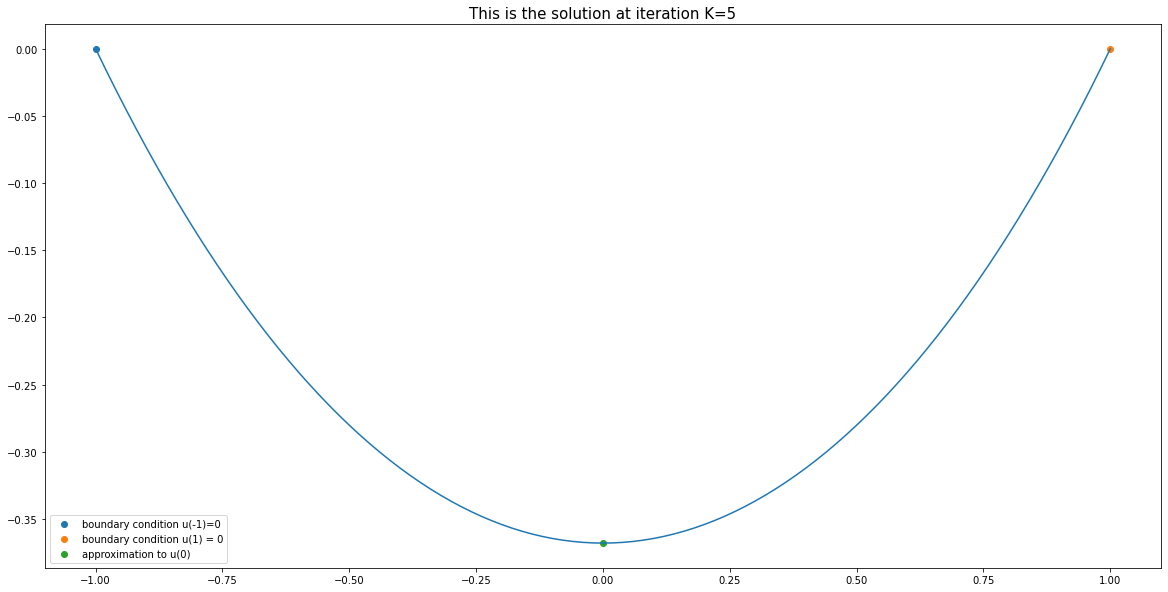

In [44]:
plt.figure(figsize=(20,10))
plt.plot(np.linspace(-1, 1,101), U_padded)
plt.scatter(-1, 0, label = "boundary condition u(-1)=0")
plt.scatter(1, 0, label = "boundary condition u(1) = 0")
plt.scatter(0, uk[49], label = 'approximation to u(0)')
plt.title("This is the solution at iteration K=5", size = 15)
plt.legend()
plt.show()

In [45]:
U_padded[50] #it's 50 bc we shift over one from the padding 1-99 has values


-0.3680482182699434

In [46]:
uk[49]

array([-0.36804822])

**Report your approximation to u(0) with three significant digits**

My approximation to $u(0)$ is $u(0) = -0.368$. This has been found after 5 iterations, meaning that the tolerance has been met at iteration $K=5$.